In [36]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [7]:
def create_cnn(input_shape):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())

    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    return model


train_datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values to [0, 1]
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'data/train',
    target_size=(32, 32),
    batch_size=32,
    class_mode='binary',
    classes=['REAL', 'FAKE']
)

test_generator = test_datagen.flow_from_directory(
    'data/test',
    target_size=(32, 32),
    batch_size=32,
    class_mode='binary',
    classes=['REAL', 'FAKE']
)

input_shape = (32, 32, 3)
model = create_cnn(input_shape)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // 32,
                    epochs=1,
                    validation_data=test_generator,
                    validation_steps=test_generator.samples // 32)

test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)


Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
625/625 [==============================] - 16s 26ms/step - loss: 0.1880 - accuracy: 0.9257
Test accuracy: 0.9257000088691711


In [89]:
def test_image(img_path):
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    img_array = img_array / 255.0

    prediction = model.predict(img_array)

    if prediction[0][0] > 0.5:
        print("The image is classified as FAKE.")
    else:
        print("The image is classified as REAL.")
        
    plt.figure(figsize=(0.5, 0.5))
    plt.imshow(img)
    plt.axis('off')
    plt.show()


1/1 [==============================] - 0s 62ms/step
The image is classified as FAKE.


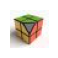

In [90]:
test_image('cube_real.jpg')

1/1 [==============================] - 0s 24ms/step
The image is classified as FAKE.


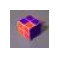

In [85]:
test_image('cube_fake.jpg')

1/1 [==============================] - 0s 20ms/step
The image is classified as REAL.


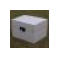

In [84]:
test_image('box_fake.jpg')

1/1 [==============================] - 0s 174ms/step
The image is classified as FAKE.


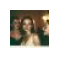

In [62]:
test_image('people_fake.jpg')

1/1 [==============================] - 0s 31ms/step
The image is classified as REAL.


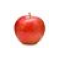

In [61]:
test_image('jablko2_real.jpg')

1/1 [==============================] - 0s 31ms/step
The image is classified as FAKE.


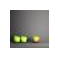

In [60]:
test_image('jablko2_fake.jpg')

1/1 [==============================] - 0s 110ms/step
The image is classified as REAL.


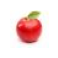

In [59]:
test_image('jablko_real.jpg')

1/1 [==============================] - 0s 30ms/step
The image is classified as FAKE.


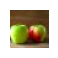

In [58]:
test_image('jablko_fake.jpg')

1/1 [==============================] - 0s 22ms/step
The image is classified as FAKE.


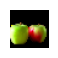

In [57]:
test_image('jablko_fake_bez_tla.png')

1/1 [==============================] - 0s 151ms/step
The image is classified as FAKE.


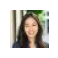

In [55]:
test_image('human_fake.jpg')

1/1 [==============================] - 0s 19ms/step
The image is classified as REAL.


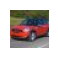

In [54]:
test_image('car_real.jpg')

1/1 [==============================] - 0s 178ms/step
The image is classified as FAKE.


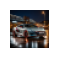

In [53]:
test_image('car_fake2.png')

1/1 [==============================] - 0s 84ms/step
The image is classified as FAKE.


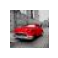

In [50]:
test_image('car_fake.jpg')

Jedyny bład modelu (z ręcznych testów)

1/1 [==============================] - 0s 39ms/step
The image is classified as FAKE.


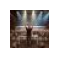

In [51]:
test_image('studio_real.jpg')